In [61]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [62]:
bikeshare = pd.read_csv('E:\\Pinkal\\Upgrad_PG_AIML\\Machine_Learning_1_Linear_Regression\\Bike Sharing Case Study\\day.csv')
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [63]:
bikeshare.shape

(730, 16)

In [64]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


Thus, we have no null data in the entire dataset

In [65]:
bikeshare.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Analysis

- Since we have year,month, weekday, workingday  as separate columns, we don't need an extra date column dteday. So we can safely remove this column from the dataset.

In [66]:
bikeshare = bikeshare.drop('dteday', axis = 1)
bikeshare.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- We can also remove instant column since it is denoting the instant ids which will not be required in the model building.

In [67]:
bikeshare = bikeshare.drop('instant', axis = 1)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Since cnt column represents total of casual and registered columns and it is the target variable that we have to predict, we can remove both casual and registered columns from the dataset

In [68]:
bikeshare = bikeshare.drop(['casual', 'registered'], axis = 1)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [69]:
 # Mapping the season column
bikeshare.season = bikeshare.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [70]:
# Mapping the month column
bikeshare.mnth = bikeshare.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [71]:
# Mapping the weekday column
bikeshare.weekday = bikeshare.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [72]:
# Mapping the weathersit column
bikeshare.weathersit = bikeshare.weathersit.map({1:'Clear_Few_Clouds',2:'Misty_Cloudy',3:'Light_snowrain',4:'Heavy_snowrain'})

In [73]:
# Check the dataset again
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


# Visualize the data

<Figure size 1440x864 with 0 Axes>

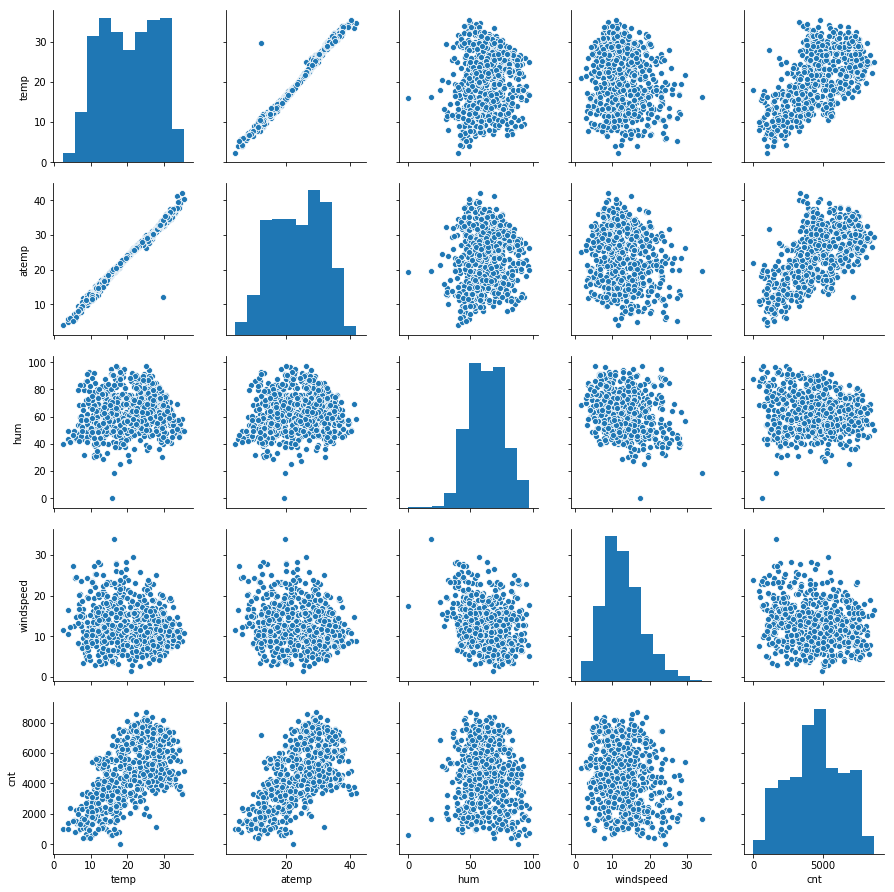

In [74]:
# visualize numerical variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize = (20, 12))
sns.pairplot(data = bikeshare, vars = num_vars)
plt.show()

- From the above plots we can observe that there exist a linear relationship between target variable cnt and independent variables temp and atemp.

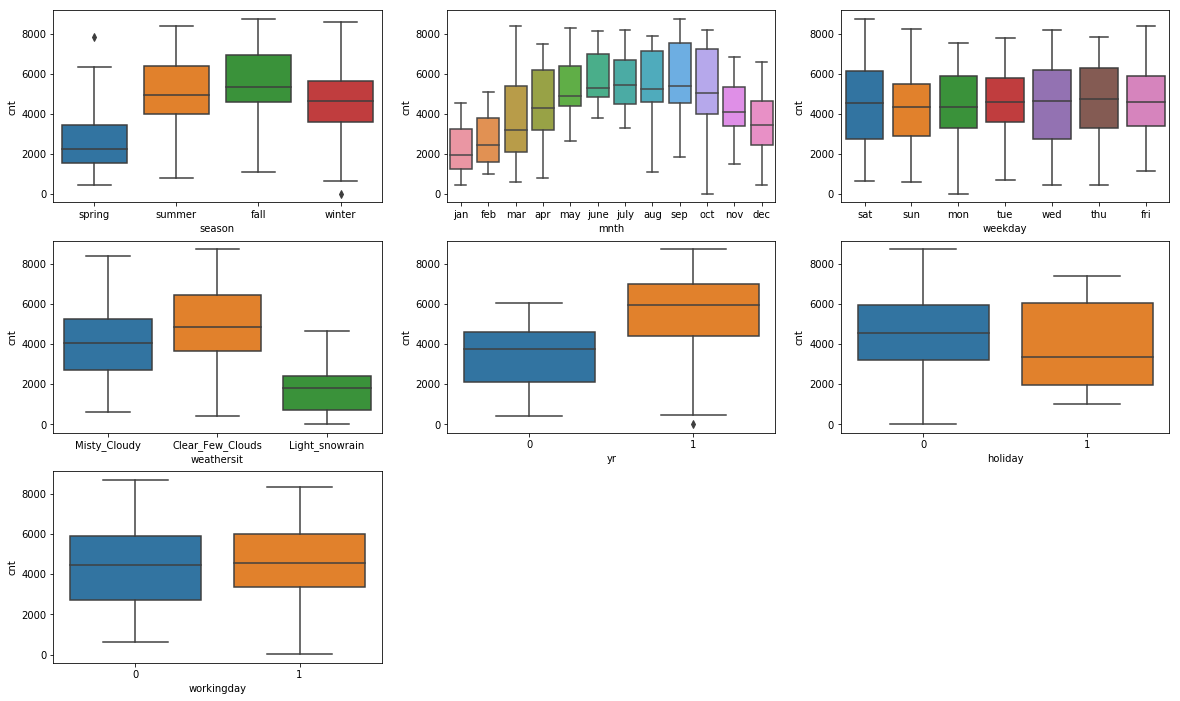

In [75]:
# Visualize categorical data
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare)
plt.show()

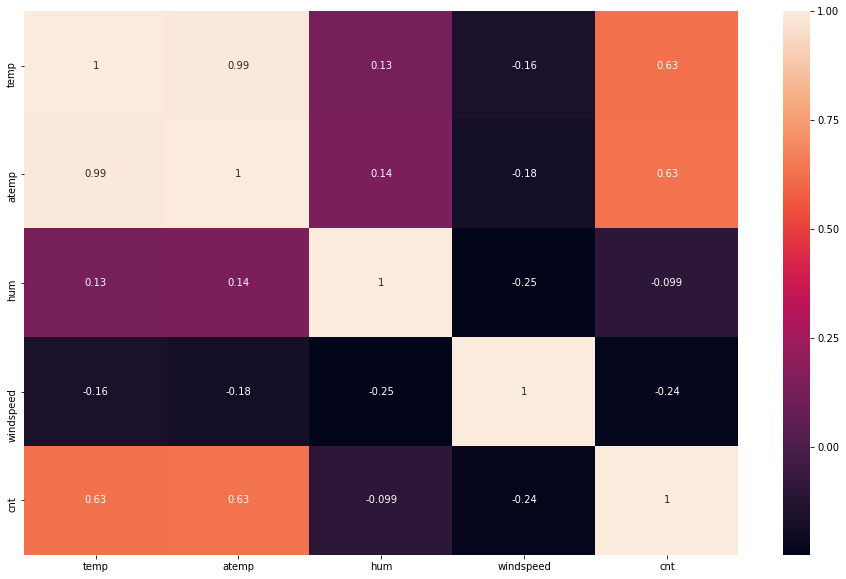

In [76]:
# checking correlation of numrical variables
plt.figure(figsize = (16,10))
sns.heatmap(bikeshare[num_vars].corr(), annot = True)
plt.show()

- From the above figure we can conclude that temp and atemp variables are highly correlated. Hence, we can remove any of these columns from the dataset.

In [77]:
# removing temp column from the dataset
bikeshare = bikeshare.drop('temp', axis = 1)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty_Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty_Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600


# Final data preparation

In [78]:
# prepare dummy variables
season = pd.get_dummies(bikeshare['season'], drop_first = True)
month = pd.get_dummies(bikeshare['mnth'], drop_first = True)
weekday = pd.get_dummies(bikeshare['weekday'], drop_first = True)
weather = pd.get_dummies(bikeshare['weathersit'], drop_first = True)

In [79]:
# Merge new dataframes with the original dataset
bikeshare = pd.concat([bikeshare, season, month, weekday, weather], axis = 1)
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty_Cloudy
0,spring,0,jan,0,sat,0,Misty_Cloudy,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,Misty_Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [80]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
season            730 non-null object
yr                730 non-null int64
mnth              730 non-null object
holiday           730 non-null int64
weekday           730 non-null object
workingday        730 non-null int64
weathersit        730 non-null object
atemp             730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
cnt               730 non-null int64
spring            730 non-null uint8
summer            730 non-null uint8
winter            730 non-null uint8
aug               730 non-null uint8
dec               730 non-null uint8
feb               730 non-null uint8
jan               730 non-null uint8
july              730 non-null uint8
june              730 non-null uint8
mar               730 non-null uint8
may               730 non-null uint8
nov               730 non-null uint8
oct               730 non-null uin

In [81]:
# drop redundant columns
bikeshare = bikeshare.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1)
bikeshare.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty_Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


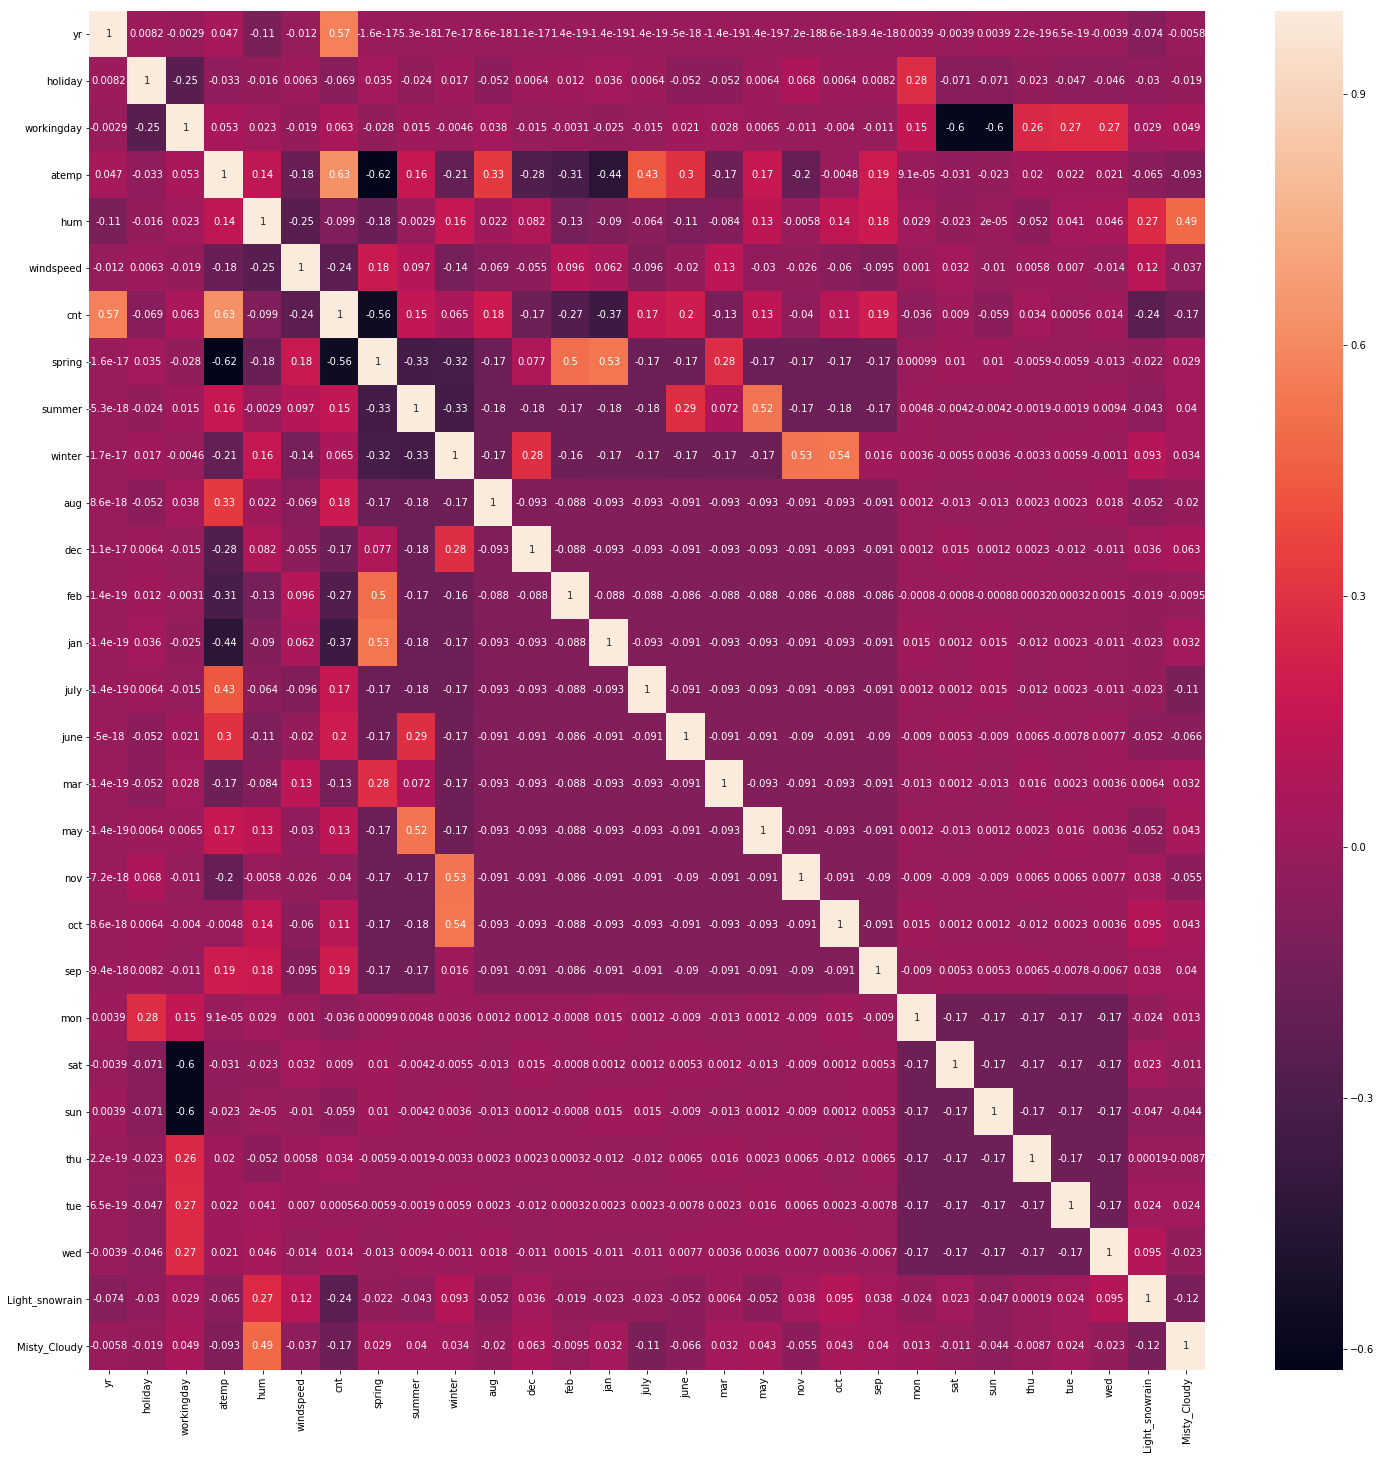

In [82]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(bikeshare.corr(), annot = True)
plt.show()

## Split data into train and test set

In [83]:
df_train, df_test = train_test_split(bikeshare, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Feature scaling
- Scale the numerical variables

In [84]:
scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty_Cloudy
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train the model

In [86]:
y_train = df_train.pop('cnt')
X_train = df_train

In [87]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('july', False, 2),
 ('june', True, 1),
 ('mar', False, 9),
 ('may', True, 1),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', False, 3),
 ('thu', False, 6),
 ('tue', False, 5),
 ('wed', False, 7),
 ('Light_snowrain', True, 1),
 ('Misty_Cloudy', True, 1)]

In [89]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'june', 'may', 'nov',
       'sep', 'sat', 'Light_snowrain', 'Misty_Cloudy'],
      dtype='object')

In [90]:
# check which columns has been rejected
X_train.columns[~rfe.support_]

Index(['july', 'mar', 'oct', 'mon', 'sun', 'thu', 'tue', 'wed'], dtype='object')

In [91]:
X_train_rfe = X_train[col]

In [92]:
# add constant
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,dec,feb,jan,june,may,nov,sep,sat,Light_snowrain,Misty_Cloudy
576,1.0,1,0,1,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,1,0,1
111,1.0,0,0,1,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,1


- Fit the model

## Model 1

In [93]:
lr_rfe1 = sm.OLS(y_train, X_train_rfe).fit()
lr_rfe1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.5
Date:                Wed, 04 May 2022   Prob (F-statistic):          4.11e-186
Time:                        17:03:09   Log-Likelihood:                 521.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     489   BIC:                            -911.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2987      0.039      7.716      0.000       0.223       0.375
yr                 0.2338      0.008     29.059      0.000       0.218       0.250
holiday           -0.0415      0.027     -1.528      0.127      -0.095       0.012
workingday         0.0449      0.012      3.882      0.000       0.022       0.068
atemp              0.4066      0.041      9.931      0.000       0.326       0.487
hum               -0.1470      0.038     -3.852      0.000      -0.222      -0.072
windspeed         -0.1683      0.026     -6.533      0.000      -0.219      -0.118
spring            -0.0434      0.023     -1.924      0.055      -0.088       0.001
summer             0.0404      0.018      2.197      0.029       0.004       0.077
winter             0.1131      0.019      6.113      0.000       0.077       0.149
aug                0.0528      0.018      2.965      0.003       0.018       0.088
dec               -0.0568      0.018     -3.104      0.002      -0.093      -0.021
feb               -0.0431      0.022     -1.994      0.047      -0.086      -0.001
jan               -0.0768      0.021     -3.576      0.000      -0.119      -0.035
june               0.0307      0.018      1.716      0.087      -0.004       0.066
may                0.0400      0.019      2.155      0.032       0.004       0.076
nov               -0.0510      0.019     -2.693      0.007      -0.088      -0.014
sep                0.1030      0.018      5.852      0.000       0.068       0.138
sat                0.0539      0.015      3.698      0.000       0.025       0.083
Light_snowrain    -0.2516      0.026     -9.519      0.000      -0.304      -0.200
Misty_Cloudy      -0.0603      0.010     -5.791      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       83.994   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.234
Skew:                          -0.759   Prob(JB):                     4.19e-58
Kurtosis:                       6.183   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Calculate variance

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,96.59
7,spring,6.04
4,atemp,4.86
9,winter,4.11
8,summer,4.06
13,jan,2.39
5,hum,1.99
3,workingday,1.88
12,feb,1.87
16,nov,1.82


- Since spring has high VIF, let us remove spring from the train set

## Model 2

In [95]:
X = X_train_rfe.drop('spring', axis = 1)

In [96]:
# Building second model
X_train_sm = sm.add_constant(X)
lr_rfe2 = sm.OLS(y_train, X_train_sm).fit()
lr_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.8
Date:                Wed, 04 May 2022   Prob (F-statistic):          2.11e-186
Time:                        17:03:09   Log-Likelihood:                 519.10
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     490   BIC:                            -913.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2609      0.033      7.801      0.000       0.195       0.327
yr                 0.2328      0.008     28.916      0.000       0.217       0.249
holiday           -0.0431      0.027     -1.582      0.114      -0.097       0.010
workingday         0.0445      0.012      3.839      0.000       0.022       0.067
atemp              0.4504      0.034     13.199      0.000       0.383       0.517
hum               -0.1553      0.038     -4.083      0.000      -0.230      -0.081
windspeed         -0.1728      0.026     -6.719      0.000      -0.223      -0.122
summer             0.0626      0.014      4.354      0.000       0.034       0.091
winter             0.1363      0.014      9.680      0.000       0.109       0.164
aug                0.0653      0.017      3.922      0.000       0.033       0.098
dec               -0.0554      0.018     -3.025      0.003      -0.091      -0.019
feb               -0.0537      0.021     -2.566      0.011      -0.095      -0.013
jan               -0.0845      0.021     -3.987      0.000      -0.126      -0.043
june               0.0294      0.018      1.639      0.102      -0.006       0.065
may                0.0358      0.018      1.938      0.053      -0.000       0.072
nov               -0.0460      0.019     -2.443      0.015      -0.083      -0.009
sep                0.1141      0.017      6.856      0.000       0.081       0.147
sat                0.0531      0.015      3.634      0.000       0.024       0.082
Light_snowrain    -0.2469      0.026     -9.354      0.000      -0.299      -0.195
Misty_Cloudy      -0.0591      0.010     -5.670      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       75.819   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.259
Skew:                          -0.704   Prob(JB):                     3.31e-49
Kurtosis:                       5.919   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,71.70
4,atemp,3.36
7,summer,2.46
8,winter,2.36
12,jan,2.31
5,hum,1.97
3,workingday,1.88
17,sat,1.79
15,nov,1.79
11,feb,1.75


- Since hliday has high p-value, let us remove holiday and see if the model improves

## Model 3

In [98]:
X = X.drop('holiday', axis = 1)

In [99]:
# Building third model
X_train_sm = sm.add_constant(X)
lr_rfe3 = sm.OLS(y_train, X_train_sm).fit()
lr_rfe3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 04 May 2022   Prob (F-statistic):          5.86e-187
Time:                        17:03:10   Log-Likelihood:                 517.80
No. Observations:                 510   AIC:                            -997.6
Df Residuals:                     491   BIC:                            -917.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2553      0.033      7.665      0.000       0.190       0.321
yr                 0.2329      0.008     28.897      0.000       0.217       0.249
workingday         0.0508      0.011      4.662      0.000       0.029       0.072
atemp              0.4491      0.034     13.146      0.000       0.382       0.516
hum               -0.1544      0.038     -4.055      0.000      -0.229      -0.080
windspeed         -0.1733      0.026     -6.726      0.000      -0.224      -0.123
summer             0.0621      0.014      4.315      0.000       0.034       0.090
winter             0.1368      0.014      9.698      0.000       0.109       0.164
aug                0.0655      0.017      3.929      0.000       0.033       0.098
dec               -0.0567      0.018     -3.090      0.002      -0.093      -0.021
feb               -0.0556      0.021     -2.657      0.008      -0.097      -0.015
jan               -0.0863      0.021     -4.073      0.000      -0.128      -0.045
june               0.0304      0.018      1.690      0.092      -0.005       0.066
may                0.0366      0.018      1.977      0.049       0.000       0.073
nov               -0.0496      0.019     -2.651      0.008      -0.086      -0.013
sep                0.1123      0.017      6.750      0.000       0.080       0.145
sat                0.0594      0.014      4.223      0.000       0.032       0.087
Light_snowrain    -0.2464      0.026     -9.325      0.000      -0.298      -0.195
Misty_Cloudy      -0.0589      0.010     -5.644      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       81.288   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.857
Skew:                          -0.743   Prob(JB):                     9.15e-55
Kurtosis:                       6.083   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,70.90
3,atemp,3.36
6,summer,2.46
7,winter,2.36
11,jan,2.31
4,hum,1.97
14,nov,1.76
10,feb,1.74
13,may,1.69
16,sat,1.66


- Since jun has high p-value, let us remove jun and see if the model improves

## Model 4

In [101]:
X = X.drop('june', axis = 1)

In [102]:
# Building fourth model
X_train_sm = sm.add_constant(X)
lr_rfe4 = sm.OLS(y_train, X_train_sm).fit()
lr_rfe4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 04 May 2022   Prob (F-statistic):          1.88e-187
Time:                        17:03:10   Log-Likelihood:                 516.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     492   BIC:                            -920.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2502      0.033      7.529      0.000       0.185       0.316
yr                 0.2322      0.008     28.794      0.000       0.216       0.248
workingday         0.0508      0.011      4.658      0.000       0.029       0.072
atemp              0.4709      0.032     14.854      0.000       0.409       0.533
hum               -0.1598      0.038     -4.204      0.000      -0.235      -0.085
windspeed         -0.1757      0.026     -6.816      0.000      -0.226      -0.125
summer             0.0692      0.014      5.012      0.000       0.042       0.096
winter             0.1358      0.014      9.622      0.000       0.108       0.164
aug                0.0588      0.016      3.625      0.000       0.027       0.091
dec               -0.0537      0.018     -2.935      0.003      -0.090      -0.018
feb               -0.0523      0.021     -2.504      0.013      -0.093      -0.011
jan               -0.0814      0.021     -3.873      0.000      -0.123      -0.040
may                0.0257      0.017      1.479      0.140      -0.008       0.060
nov               -0.0475      0.019     -2.540      0.011      -0.084      -0.011
sep                0.1078      0.016      6.553      0.000       0.075       0.140
sat                0.0596      0.014      4.228      0.000       0.032       0.087
Light_snowrain    -0.2462      0.026     -9.296      0.000      -0.298      -0.194
Misty_Cloudy      -0.0585      0.010     -5.598      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.205   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.888
Skew:                          -0.745   Prob(JB):                     3.63e-52
Kurtosis:                       5.988   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,70.32
3,atemp,2.88
7,winter,2.36
6,summer,2.26
11,jan,2.26
4,hum,1.95
13,nov,1.76
10,feb,1.73
2,workingday,1.66
15,sat,1.66


- Since may has high p-value, we can remove may and see if the model improves

## Model 5

In [104]:
X = X.drop('may', axis = 1)

In [105]:
# Building fifth model
X_train_sm = sm.add_constant(X)
lr_rfe5 = sm.OLS(y_train, X_train_sm).fit()
lr_rfe5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 04 May 2022   Prob (F-statistic):          4.22e-188
Time:                        17:03:10   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   BIC:                            -924.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2426      0.033      7.380      0.000       0.178       0.307
yr                 0.2317      0.008     28.722      0.000       0.216       0.248
workingday         0.0511      0.011      4.681      0.000       0.030       0.073
atemp              0.4763      0.032     15.107      0.000       0.414       0.538
hum               -0.1518      0.038     -4.030      0.000      -0.226      -0.078
windspeed         -0.1769      0.026     -6.859      0.000      -0.228      -0.126
summer             0.0780      0.012      6.271      0.000       0.054       0.102
winter             0.1357      0.014      9.601      0.000       0.108       0.163
aug                0.0575      0.016      3.549      0.000       0.026       0.089
dec               -0.0525      0.018     -2.871      0.004      -0.088      -0.017
feb               -0.0500      0.021     -2.399      0.017      -0.091      -0.009
jan               -0.0792      0.021     -3.772      0.000      -0.120      -0.038
nov               -0.0463      0.019     -2.476      0.014      -0.083      -0.010
sep                0.1068      0.016      6.487      0.000       0.074       0.139
sat                0.0593      0.014      4.203      0.000       0.032       0.087
Light_snowrain    -0.2487      0.026     -9.402      0.000      -0.301      -0.197
Misty_Cloudy      -0.0589      0.010     -5.626      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       78.325   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.743   Prob(JB):                     1.49e-48
Kurtosis:                       5.856   Cond. No.                         20.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.63
3,atemp,2.84
7,winter,2.36
11,jan,2.25
4,hum,1.91
6,summer,1.83
12,nov,1.75
10,feb,1.72
2,workingday,1.66
14,sat,1.66


Adding wed and let us see if the model improves

## Model 6

In [107]:
X['wed']=X_train['wed']
X.head()

,const,yr,workingday,atemp,hum,windspeed,summer,winter,aug,dec,feb,jan,nov,sep,sat,Light_snowrain,Misty_Cloudy,wed
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0,1,0,1,0
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0,1,0
111,1.0,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,0,0,0,0,0,1,0


In [108]:
# Building sixth model
X_train_sm = sm.add_constant(X)
lr_rfe6 = sm.OLS(y_train, X_train_sm).fit()
lr_rfe6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.6
Date:                Wed, 04 May 2022   Prob (F-statistic):          4.51e-187
Time:                        17:03:11   Log-Likelihood:                 515.41
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     492   BIC:                            -918.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2430      0.033      7.387      0.000       0.178       0.308
yr                 0.2317      0.008     28.709      0.000       0.216       0.248
workingday         0.0494      0.011      4.393      0.000       0.027       0.072
atemp              0.4762      0.032     15.094      0.000       0.414       0.538
hum               -0.1523      0.038     -4.040      0.000      -0.226      -0.078
windspeed         -0.1767      0.026     -6.849      0.000      -0.227      -0.126
summer             0.0778      0.012      6.242      0.000       0.053       0.102
winter             0.1358      0.014      9.600      0.000       0.108       0.164
aug                0.0575      0.016      3.543      0.000       0.026       0.089
dec               -0.0525      0.018     -2.867      0.004      -0.088      -0.017
feb               -0.0502      0.021     -2.405      0.017      -0.091      -0.009
jan               -0.0795      0.021     -3.781      0.000      -0.121      -0.038
nov               -0.0466      0.019     -2.490      0.013      -0.083      -0.010
sep                0.1065      0.016      6.463      0.000       0.074       0.139
sat                0.0593      0.014      4.201      0.000       0.032       0.087
Light_snowrain    -0.2499      0.027     -9.419      0.000      -0.302      -0.198
Misty_Cloudy      -0.0588      0.010     -5.611      0.000      -0.079      -0.038
wed                0.0075      0.011      0.652      0.515      -0.015       0.030
==============================================================================
Omnibus:                       77.464   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.791
Skew:                          -0.737   Prob(JB):                     8.40e-48
Kurtosis:                       5.834   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# compute VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.65
3,atemp,2.84
7,winter,2.36
11,jan,2.25
4,hum,1.91
6,summer,1.83
2,workingday,1.76
12,nov,1.75
10,feb,1.72
14,sat,1.66


From the above model we see that wed has high p-value, so it is not significant at all. Hence, we can remove wed from the dataset.

In [110]:
X = X.drop('wed', axis = 1)
X.head()

,const,yr,workingday,atemp,hum,windspeed,summer,winter,aug,dec,feb,jan,nov,sep,sat,Light_snowrain,Misty_Cloudy
576,1.0,1,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,0,0,0,0,0,0,0,0,1,0,1
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,1,0,0,0,0,0,0,0,1,0,1
111,1.0,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,0,0,0,0,0,1


## From all of the above models, we can see that model 5 is better since p-values of the predictor variables seems to be significant and VIF of the predictor variables are less than 5. We can disregard VIF of const is very high but p-value of const is significant. Probability of F-Statistic tends to 0 also. All of these states that model 5 is overall significant.

In [111]:
round(lr_rfe5.params, 4)

const             0.2426
yr                0.2317
workingday        0.0511
atemp             0.4763
hum              -0.1518
windspeed        -0.1769
summer            0.0780
winter            0.1357
aug               0.0575
dec              -0.0525
feb              -0.0500
jan              -0.0792
nov              -0.0463
sep               0.1068
sat               0.0593
Light_snowrain   -0.2487
Misty_Cloudy     -0.0589
dtype: float64

# Prediction and Evaluation of the model 5 on the train set

In [112]:
#predict y_train values
y_train_pred = lr_rfe5.predict(X)

## Residual Analysis

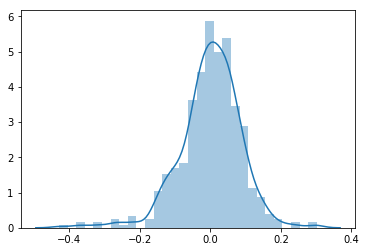

In [113]:
res = y_train - y_train_pred
sns.distplot(res)

## Homoscedasticity

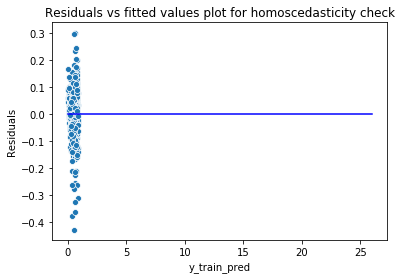

In [126]:
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_train_pred')
plt.ylabel('Residuals')
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Making prediction using the final model on the test set

In [115]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty_Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [116]:
y_test = df_test.pop('cnt')
X_test = df_test

In [117]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snowrain,Misty_Cloudy
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [118]:
new_cols = X.columns
X_test_sm = X_test_sm[new_cols]
X_test_sm.head()

,const,yr,workingday,atemp,hum,windspeed,summer,winter,aug,dec,feb,jan,nov,sep,sat,Light_snowrain,Misty_Cloudy
184,1.0,0,0,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,0,0,0,1
535,1.0,1,1,0.842587,0.610133,0.153728,1,0,0,0,0,0,0,0,0,0,0
299,1.0,0,1,0.496145,0.837699,0.334206,0,1,0,0,0,0,0,0,0,0,1
221,1.0,0,1,0.795343,0.437098,0.339570,0,0,1,0,0,0,0,0,0,0,0
152,1.0,0,1,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,0,0,0,0


In [119]:
y_test_pred = lr_rfe5.predict(X_test_sm)

In [120]:
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print(r2_score_test)

0.8220700633206158


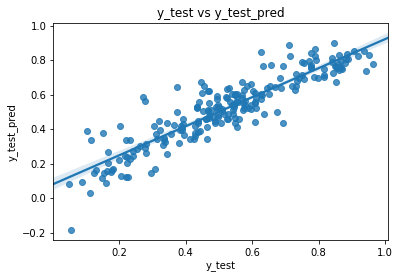

In [121]:
# Model evaluation
plt.figure()
sns.regplot(y_test, y_test_pred)
plt.title('y_test vs y_test_pred') 
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.show()

In [122]:
adjusted_r2_test = round(1-(1-r2_score_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_test)

0.796


# Comparison between training set and test set

- R^2 value of train set = 0.846 and R^2 value of test set = 0.822
- Adjusted r^2 of train set = 0.841 and Adjusted r^2 of test set = 0.796

# Linear equation of our best fit line can be denoted using the following:

<i><b>
cnt = 0.2426 + 0.2317 * (yr) + 0.0511 * (workingday) + 0.4763 * (atemp) - 0.1518 * (hum) - 0.1769 * (windspeed) + 0.0780 * (summer) + 0.1357 * (winter) + 0.0575 * (aug) - 0.0525 * (dec) - 0.0500 * (feb) - 0.0792 * (jan) - 0.0463 * (nov) + 0.1068 * (sep) + 0.0593 * (sat) - 0.2487 * (light_snowrain) - 0.0589 * (Misty_Cloudy)
    </b></i>

## Bike demands depend on : year, workingday, feeling temparature, humidity, windspeed, summer, winter, august, december, february, january, november, september, saturday, light snow rainy weather, Misty partial cloud weather.